In [104]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.optimize import curve_fit

In [105]:
%ls *.csv

blackWeight4.csv  blackWeight6.csv  GOOD_DATA_blackWeight6.csv


In [106]:
df = pd.read_csv('blackWeight6.csv')
#df.plot('t','theta', marker='.')
#df.plot('t','x', marker='.')

good5d = df[1:150]

good5d = good5d[~np.isnan(good5d.theta)]


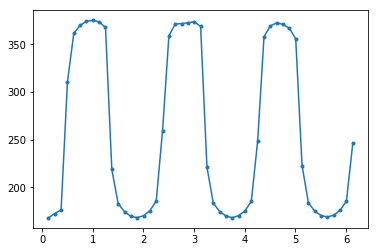

In [107]:
pl.plot(good5d.t, good5d.theta, marker = '.')
pl.grid


def model(t,A, omega, phi, offset):
    return A*np.sin(omega*t + phi) + offset



In [108]:
A0 = 350
omega0 = 2*np.pi /2
dtheta = 360/1000
sig = np.ones(len(good5d.t))*dtheta

par, cov = curve_fit(model,good5d.t, good5d.theta, p0=(A0, omega0, 0,0))

In [109]:
A, omega,phi,offset = par
dA, dOmega, dPhi, dOffset = np.sqrt(np.diag(cov))

print('A = %5.3f +/- %5.3f' % (A,dA))
print('omega = %5.3f +/- %5.3f' % (omega,dOmega))

print('T = %5.3f' % (2*np.pi/omega))


A = 122.164 +/- 5.982
omega = 3.329 +/- 0.026
T = 1.888


Chi squared info here https://www.youtube.com/watch?v=QE0v3HHcKbs

In [125]:
expected = model(good5d.t, A, omega, phi,offset);

chi_squared_stat = (((good5d.theta - expected)**2)/expected).sum()

print('Our chi squared stastic is', chi_squared_stat)

crit = stats.chi2.ppf( q = 0.9, df = 1)
p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = 1)

print('if the p_value is under 0.05 then it our model works! p is', p_value)

Our chi squared stastic is 162.25770272665633
if the p_value is under 0.05 then it our model works! p is 0.0
